Основные шаги исследования
Загрузка и ознакомление с данными

Импортируйте таблицу и изучите её структуру: какие столбцы присутствуют, какие типы данных, сколько строк, есть ли пропуски.
Оцените качество данных: наличие дубликатов, неточностей, аномальных значений.
Определите период данных. Исходя из условий проекта, данные даны до 2016 года, причём наша задача – на основе данных до конца 2016 года понять закономерности для 2017 года.
Предобработка данных

Приведение столбцов к нужным типам: год выпуска – целое число, оценки пользователей – числовой формат (учесть, что иногда пользователи ставят оценки в виде строк, например, "tbd"), а столбец с рейтингом ESRB может быть категориальным признаком.
Обработка пропусков: возможны пропуски в оценках, жанрах, годах выхода. Надо решить, как их заполнить или удалить.
Выделение актуального периода для анализа трендов: индустрия игр очень быстро развивается. Анализ данных за слишком давние года (например, до 2000-х) может быть нерелевантен при прогнозах на 2017 год. Определите «актуальный период» – например, последние 4-5 лет (2012-2016), чтобы сосредоточиться на современных платформах и вкусах потребителей.
Исследовательский анализ данных (EDA)

Распределение продаж по годам:
Посмотрите, как меняются глобальные продажи по годам. Есть ли спад или рост в последние годы? Какие годы наиболее релевантны для прогноза?

Продажи по платформам:
Определите самые популярные платформы по продажам и их динамику. Выявите «живые» платформы (те, где выпускались игры в последние годы и были высокие продажи) и «угасающие» (давно не имеющие релизов).

Продажи по жанрам:
Посмотрите, какие жанры наиболее популярны. Есть ли смена лидеров по популярности с течением времени?

Анализ региональных продаж:
Сравните, какие платформы и жанры популярны в разных регионах (NA, EU, JP, Other). Например, в Японии могут быть популярны одни жанры (JRPG, Fighting), в Северной Америке – другие (Sports, Shooter), а в Европе ещё какие-то. Это поможет целенаправленно выбирать игры для конкретных региональных кампаний.

Оценки пользователей и критиков:
Исследуйте взаимосвязь между оценками критиков/пользователей и объемами продаж. Есть ли сильная корреляция между высоким рейтингом и продажами? Часто критики и пользователи оценивают игры по-разному – проанализируйте эти различия.

Рейтинг ESRB:
Исследуйте влияние возрастного рейтинга на продажи. Например, игры с рейтингом «М» (Mature) могут быть популярны в одних регионах, а семейные игры с рейтингом «E» (Everyone) – в других.

Определение “успешной” игры:
Можно выбрать некий порог глобальных продаж (например, более 1 млн копий) и сравнить особенности игр, превысивших этот порог, с теми, что не дотягивают.

На этом этапе будут сформированы первичные гипотезы:

«Живые» платформы и жанры, на которые стоит ориентироваться.
Возможное влияние оценки критиков и пользователей.
Влияние возрастного рейтинга на продажи.
Статистический анализ и проверка гипотез

Проверьте статистически значимые различия в продажах между разными жанрами, рейтингами ESRB или платформами за последние годы.
Оцените корреляцию между числовыми показателями (оценки пользователей и критиков, количество оценок) и продажами.
Портрет потенциально успешной игры
На основе проведенного анализа выделите «признаки успеха». Например:

Для глобального успеха часто подходят игры определённого жанра (к примеру, Action или Shooter) на популярных текущих платформах (PS4, Xbox One в контексте 2016 года).
Возможно, игры с высокими оценками критиков продаются лучше – в таком случае стоит обратить внимание на качество продукта и репутацию разработчиков.
ESRB-рейтинг может влиять на целевую аудиторию: если вы ориентированы на массовый рынок, лучше выбирать «E» или «T», если ваш продукт ориентирован на зрелую аудиторию – «M».
Рекомендации для 2017 года (или будущего периода)
Сформулируйте конкретные рекомендации:

На какие платформы делать основной упор при выпуске новых игр?
На какие жанры стоит обратить внимание для максимальных продаж?
В каких регионах запускать активную рекламную кампанию для того или иного продукта?
Как возрастной рейтинг может повлиять на стратегию продвижения?
Стоит ли рассчитывать на успех без высоких оценок критиков и пользователей или важно работать над качеством продукта?
Использование моделей прогнозирования (опционально)
Если задача подразумевает, можно использовать машинное обучение или регрессионный анализ для предсказания продаж новой игры на основе её атрибутов (жанр, платформа, предполагаемый рейтинг, оценки).

Постройте модель (например, линейную регрессию или случайный лес) для прогнозирования объёма продаж.
Используйте полученные коэффициенты и важности признаков для понимания, какие факторы наиболее сильны.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Загрузка и ознакомление с данными

# Загрузка данных из CSV-файла (предполагается, что вы скачали Google Sheets как CSV)
data = pd.read_csv('/content/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


In [ ]:
# Удаление дубликатов
data = data.drop_duplicates()
print("\nДанные после удаления дубликатов:", data.shape)

# Обработка типов данных
# Преобразуем 'Year' в целочисленный тип
data['Year_of_Release'] = pd.to_numeric(data['Year_of_Release'], errors='coerce')

# Преобразуем 'User_Score' в числовой тип (заменим 'tbd' на NaN)
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')

# Преобразуем 'ESRB_Rating' в категориальный тип
data['Rating'] = data['Rating'].astype('category')

# Проверка после преобразования
print("\nИнформация после преобразования типов:")
print(data.info())



Данные после удаления дубликатов: (16715, 11)

Информация после преобразования типов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16713 non-null  object  
 1   Platform         16715 non-null  object  
 2   Year_of_Release  16446 non-null  float64 
 3   Genre            16713 non-null  object  
 4   NA_sales         16715 non-null  float64 
 5   EU_sales         16715 non-null  float64 
 6   JP_sales         16715 non-null  float64 
 7   Other_sales      16715 non-null  float64 
 8   Critic_Score     8137 non-null   float64 
 9   User_Score       7590 non-null   float64 
 10  Rating           9949 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.3+ MB
None


In [ ]:

# Обработка пропусков

# Заполнение пропусков в 'Year' медианой
data['Year_of_Release'].fillna(data['Year_of_Release'].median(), inplace=True)

# Заполнение пропусков в 'User_Score' средним значением
data['User_Score'].fillna(data['User_Score'].mean(), inplace=True)

# Заполнение пропусков в 'ESRB_Rating' наиболее частым значением
data['Rating'].fillna(data['Rating'].mode()[0], inplace=True)

# Проверка на оставшиеся пропуски
print("\nКоличество пропусков после заполнения:")
print(data.isnull().sum())

# Выделение актуального периода (например, 2012-2016)
data = data[(data['Year_of_Release'] >= 2012) & (data['Year_of_Release'] <= 2016)]
print("\nДанные после фильтрации по году:")
print(data.shape)


Количество пропусков после заполнения:
Name                  2
Platform              0
Year_of_Release       0
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score            0
Rating                0
dtype: int64

Данные после фильтрации по году:
(2886, 11)


<ipython-input-31-0501114a055e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year_of_Release'].fillna(data['Year_of_Release'].median(), inplace=True)
<ipython-input-31-0501114a055e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.100000,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,7.125046,E
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,7.125046,E
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.300000,M
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,E
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,7.125046,E
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,7.125046,E
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,E


In [ ]:
data['Global_Sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['Other_sales']
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Global_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,7.125046,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,7.125046,E,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.300000,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,E,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,7.125046,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,7.125046,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,E,0.01


<ipython-input-41-6e8ab1d22e87>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year_of_Release', y='Global_Sales', data=data, estimator='sum', ci=None)


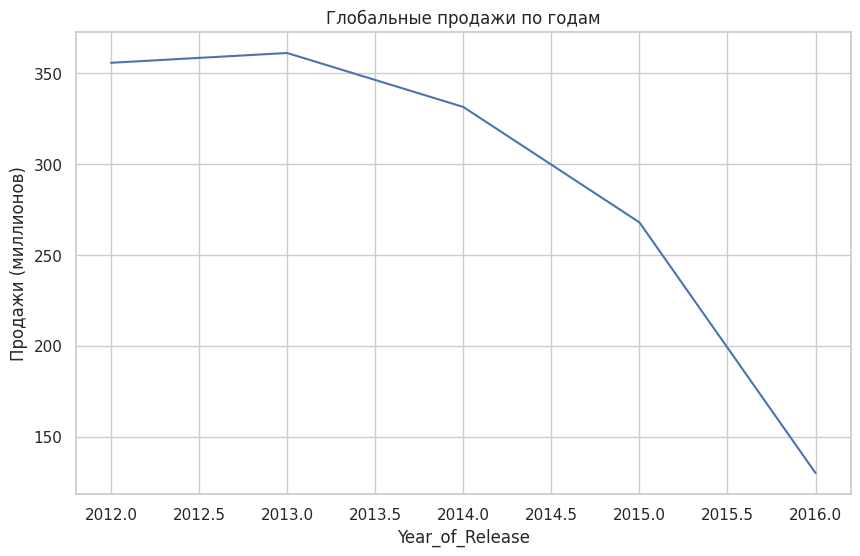

<ipython-input-41-6e8ab1d22e87>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=data, estimator='sum', ci=None)


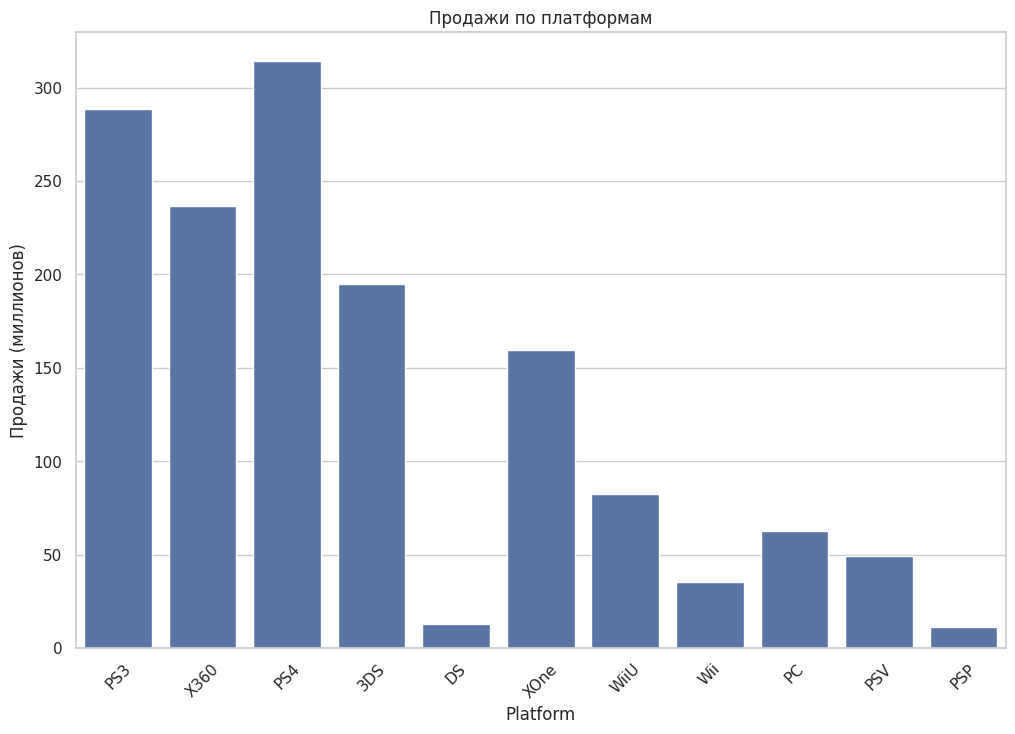

<ipython-input-41-6e8ab1d22e87>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genre', y='Global_Sales', data=data, estimator='sum', ci=None)


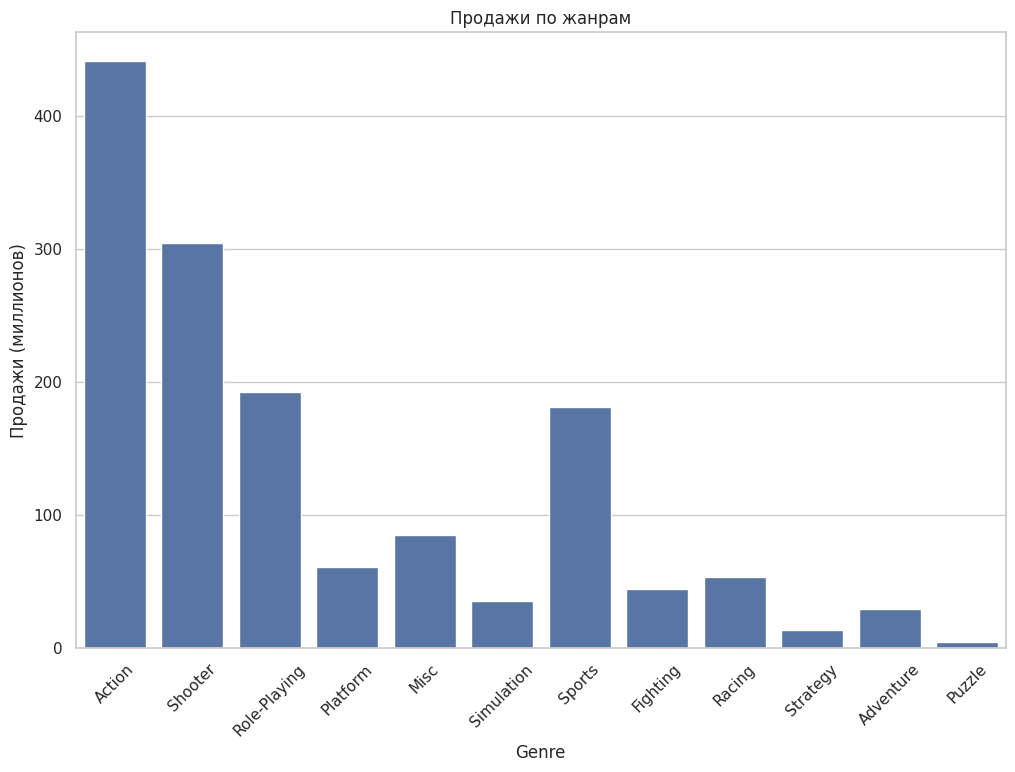

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=data, estimator='sum', ci=None)
plt.title('Глобальные продажи по годам')
plt.ylabel('Продажи (миллионов)')
plt.show()

# b. Продажи по платформам
plt.figure(figsize=(12,8))
sns.barplot(x='Platform', y='Global_Sales', data=data, estimator='sum', ci=None)
plt.title('Продажи по платформам')
plt.xticks(rotation=45)
plt.ylabel('Продажи (миллионов)')
plt.show()

# c. Продажи по жанрам
plt.figure(figsize=(12,8))
sns.barplot(x='Genre', y='Global_Sales', data=data, estimator='sum', ci=None)
plt.title('Продажи по жанрам')
plt.xticks(rotation=45)
plt.ylabel('Продажи (миллионов)')
plt.show()




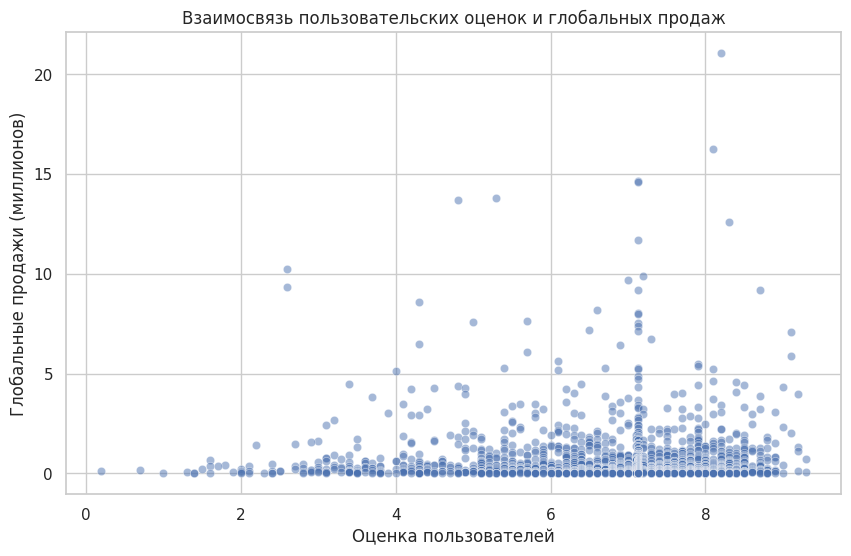

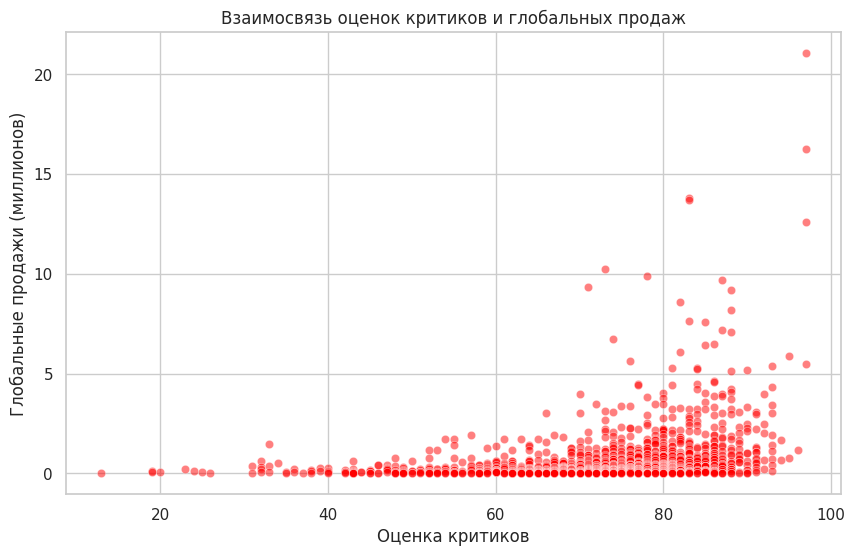

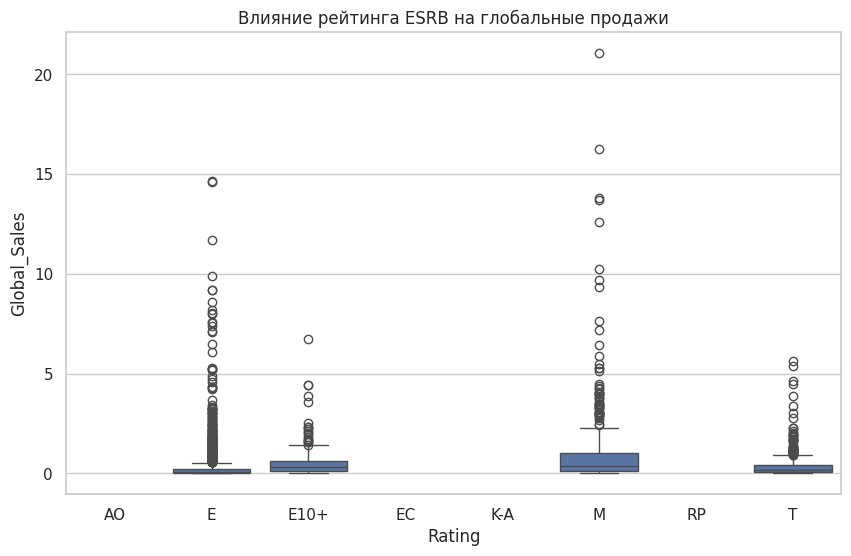

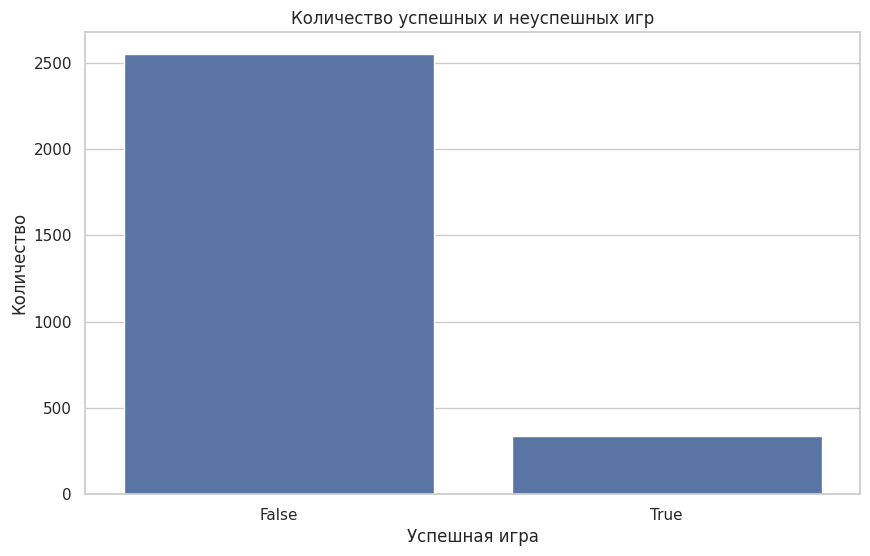

In [ ]:
# e. Взаимосвязь оценок и продаж
plt.figure(figsize=(10,6))
sns.scatterplot(x='User_Score', y='Global_Sales', data=data, alpha=0.5)
plt.title('Взаимосвязь пользовательских оценок и глобальных продаж')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (миллионов)')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=data, alpha=0.5, color='red')
plt.title('Взаимосвязь оценок критиков и глобальных продаж')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (миллионов)')
plt.show()

# f. Влияние рейтинга ESRB на продажи
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Global_Sales', data=data)
plt.title('Влияние рейтинга ESRB на глобальные продажи')
plt.show()

# g. Определение успешной игры (например, продажи >1 млн)
threshold = 1.0
data['Is_Success'] = data['Global_Sales'] > threshold

plt.figure(figsize=(10,6))
sns.countplot(x='Is_Success', data=data)
plt.title('Количество успешных и неуспешных игр')
plt.xlabel('Успешная игра')
plt.ylabel('Количество')
plt.show()


Корреляционная матрица:
                 Global_Sales  Year_of_Release  Critic_Score  User_Score
Global_Sales         1.000000        -0.083488      0.308197   -0.035908
Year_of_Release     -0.083488         1.000000      0.014969   -0.010636
Critic_Score         0.308197         0.014969      1.000000    0.510603
User_Score          -0.035908        -0.010636      0.510603    1.000000


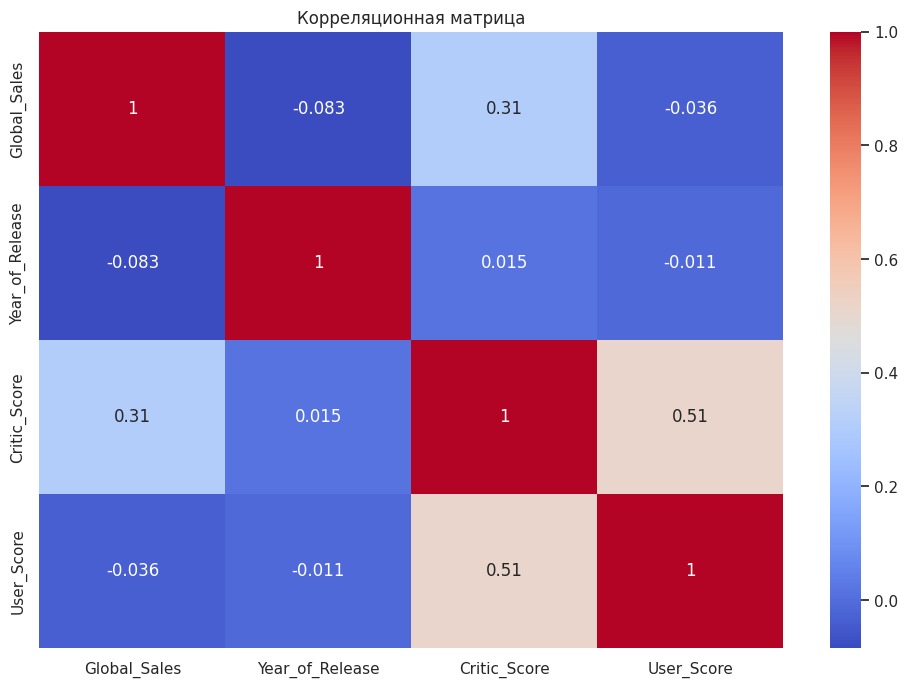


ANOVA таблица для жанра:
               sum_sq      df          F        PR(>F)
C(Genre)   227.790348    11.0  13.925161  1.915275e-26
Residual  4273.947234  2874.0        NaN           NaN

ANOVA таблица для рейтинга ESRB:
                sum_sq      df          F        PR(>F)
C(Rating)   789.312077     7.0  71.123871  5.229129e-17
Residual   4569.085670  2882.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [ ]:

# 4. Статистический анализ и проверка гипотез


corr = data[['Global_Sales', 'Year_of_Release', 'Critic_Score', 'User_Score']].corr()
print("\nКорреляционная матрица:")
print(corr)


sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# ANOVA для оценки влияния жанра на продажи
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Global_Sales ~ C(Genre)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA таблица для жанра:")
print(anova_table)

# Проверка влияния рейтинга ESRB на продажи
model_esrb = ols('Global_Sales ~ C(Rating)', data=data).fit()
anova_table_esrb = sm.stats.anova_lm(model_esrb, typ=2)
print("\nANOVA таблица для рейтинга ESRB:")
print(anova_table_esrb)

In [ ]:

# Рассмотрим средние продажи по жанрам и рейтингам
genre_sales = data.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print("\nСредние глобальные продажи по жанрам:")
print(genre_sales)

esrb_sales = data.groupby('Rating')['Global_Sales'].mean().sort_values(ascending=False)
print("\nСредние глобальные продажи по рейтингу ESRB:")
print(esrb_sales)


Средние глобальные продажи по жанрам:
Genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: Global_Sales, dtype: float64

Средние глобальные продажи по рейтингу ESRB:
Rating
M       1.024317
E10+    0.508137
T       0.395485
E       0.370054
AO           NaN
EC           NaN
K-A          NaN
RP           NaN
Name: Global_Sales, dtype: float64


<ipython-input-39-953d61cc1bf6>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_sales = data.groupby('Rating')['Global_Sales'].mean().sort_values(ascending=False)




# 6. Рекомендации для 2017 года

# На основе EDA и статистического анализа можно сделать выводы о наиболее прибыльных жанрах, платформах и рейтингах.
# Этот раздел будет основан на интерпретации полученных данных.



Линейная регрессия - MSE: 0.5125144033588331
Линейная регрессия - R²: 0.20447832832624457

Случайный лес - MSE: 0.6920811438106784
Случайный лес - R²: -0.07424405021585567


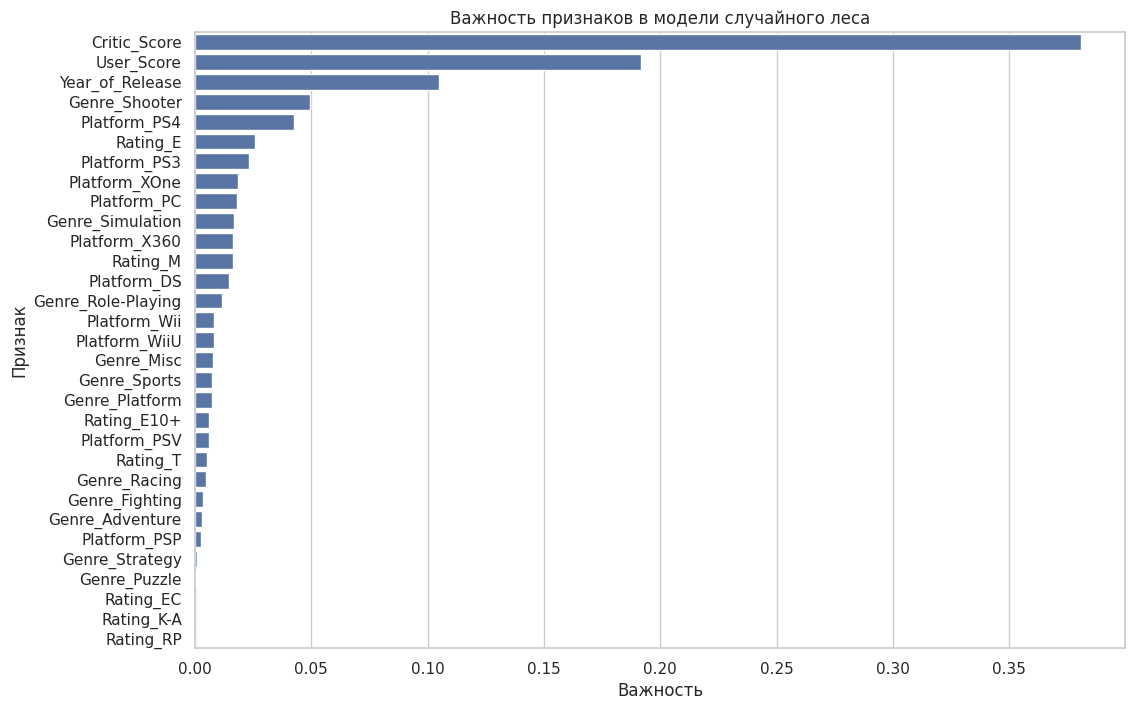

In [ ]:

# 7. Использование моделей прогнозирования

# Подготовка данных для модели
# Выберем релевантные признаки
features = ['Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']
target = 'Global_Sales'

# Обработка категориальных признаков с помощью One-Hot Encoding
data_model = pd.get_dummies(data[features], drop_first=True)

# Заполнение оставшихся пропусков, если есть
data_model = data_model.fillna(0)

# Определение X и y
X = data_model
y = data[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a. Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Оценка модели
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nЛинейная регрессия - MSE:", mse_lr)
print("Линейная регрессия - R²:", r2_lr)

# b. Случайный лес
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Оценка модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nСлучайный лес - MSE:", mse_rf)
print("Случайный лес - R²:", r2_rf)

# Важность признаков в модели случайного леса
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Важность признаков в модели случайного леса')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

# Итоговая рекомендация на основе модели
# Например, наиболее важные признаки можно использовать для фокусировки маркетинговых усилий



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


Линейная регрессия - MSE: 0.5125144033588331
Линейная регрессия - R²: 0.20447832832624457

Случайный лес - MSE: 0.6920811438106784
Случайный лес - R²: -0.07424405021585567

Gradient Boosting Regressor - MSE: 0.4416168864496461
Gradient Boosting Regressor - R²: 0.3145250134525286

Support Vector Regressor - MSE: 0.4944158562752968
Support Vector Regressor - R²: 0.23257078062885916

K-Nearest Neighbors Regressor - MSE: 0.6176983183391004
K-Nearest Neighbors Regressor - R²: 0.041212509200167835

Сравнение моделей:
                      Model       MSE        R²
0         Linear Regression  0.512514  0.204478
1             Random Forest  0.692081 -0.074244
2         Gradient Boosting  0.441617  0.314525
3  Support Vector Regressor  0.494416  0.232571
4                       KNN  0.617698  0.041213


<ipython-input-49-7f93b6ddf04e>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=comparison, palette='viridis')


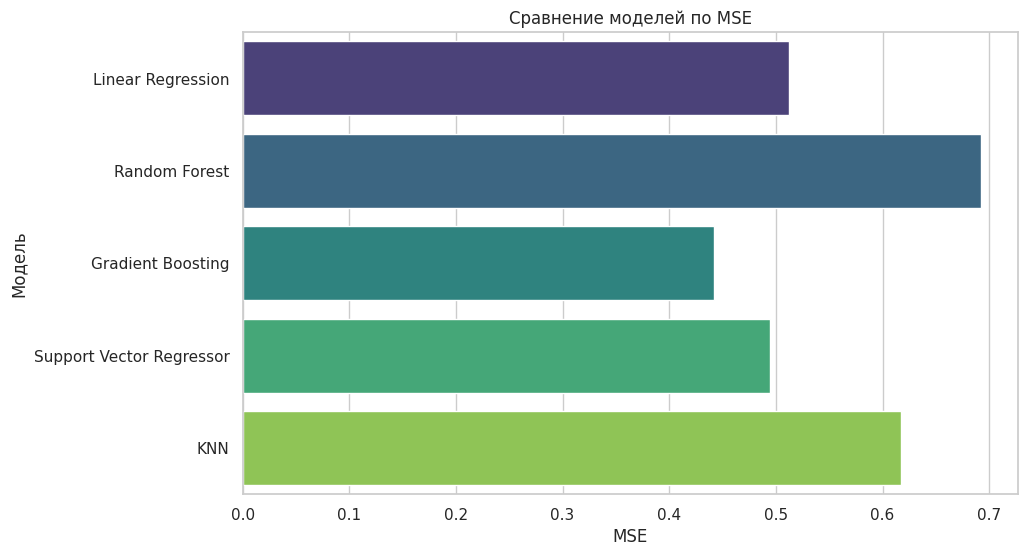

<ipython-input-49-7f93b6ddf04e>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=comparison, palette='magma')


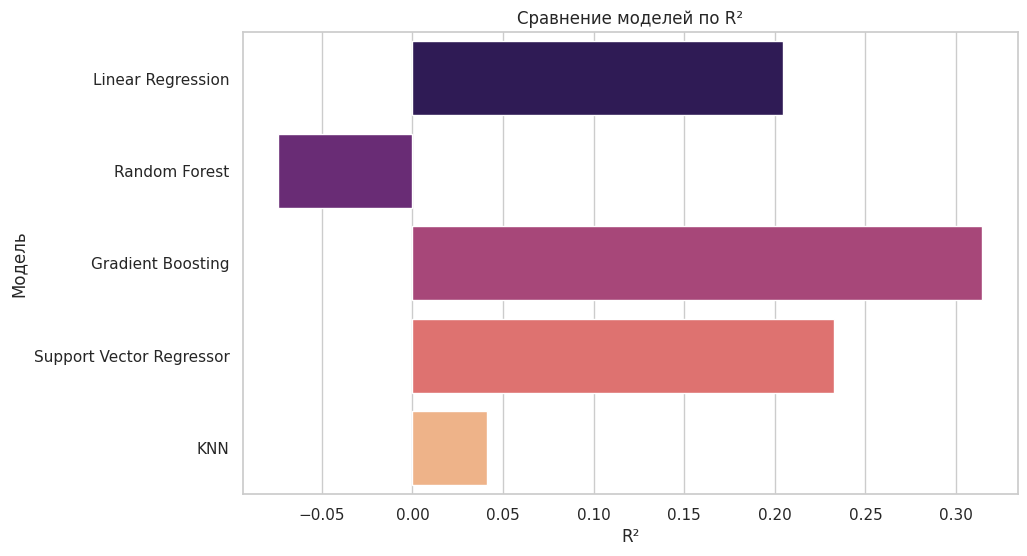

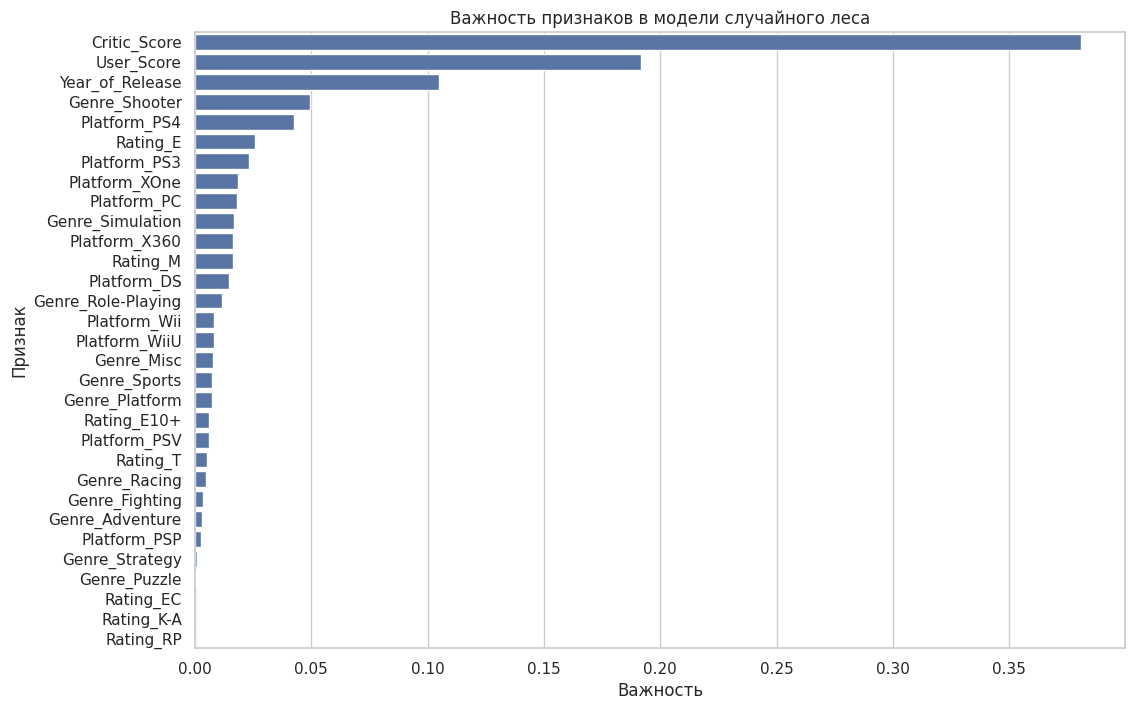

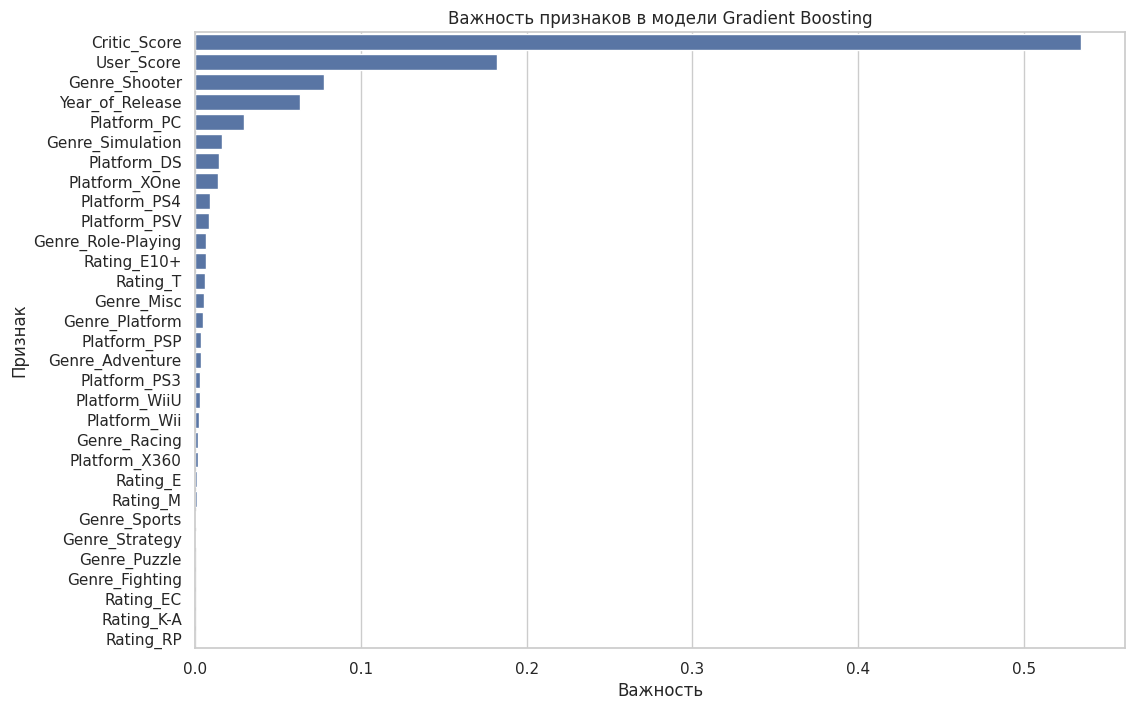

In [ ]:
features = ['Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']
target = 'Global_Sales'

# Обработка категориальных признаков с помощью One-Hot Encoding
data_model = pd.get_dummies(data[features], drop_first=True)

# Заполнение оставшихся пропусков, если есть
data_model = data_model.fillna(0)

# Определение X и y
X = data_model
y = data[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a. Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Оценка модели
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nЛинейная регрессия - MSE:", mse_lr)
print("Линейная регрессия - R²:", r2_lr)

# b. Случайный лес
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Оценка модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nСлучайный лес - MSE:", mse_rf)
print("Случайный лес - R²:", r2_rf)

# c. Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Оценка модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting Regressor - MSE:", mse_gb)
print("Gradient Boosting Regressor - R²:", r2_gb)

# d. Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Оценка модели
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSupport Vector Regressor - MSE:", mse_svr)
print("Support Vector Regressor - R²:", r2_svr)

# e. K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Оценка модели
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Regressor - MSE:", mse_knn)
print("K-Nearest Neighbors Regressor - R²:", r2_knn)


# Сравнение всех моделей
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'KNN']
mse_scores = [mse_lr, mse_rf, mse_gb, mse_svr, mse_knn]
r2_scores = [r2_lr, r2_rf, r2_gb, r2_svr, r2_knn]


comparison = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R²': r2_scores
})

print("\nСравнение моделей:")
print(comparison)

# Визуализация сравнения моделей по MSE
plt.figure(figsize=(10,6))
sns.barplot(x='MSE', y='Model', data=comparison, palette='viridis')
plt.title('Сравнение моделей по MSE')
plt.xlabel('MSE')
plt.ylabel('Модель')
plt.show()

# Визуализация сравнения моделей по R²
plt.figure(figsize=(10,6))
sns.barplot(x='R²', y='Model', data=comparison, palette='magma')
plt.title('Сравнение моделей по R²')
plt.xlabel('R²')
plt.ylabel('Модель')
plt.show()

# Дополнительно: Важность признаков в модели случайного леса
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Важность признаков в модели случайного леса')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

# Дополнительно: Важность признаков в модели Gradient Boosting
importances_gb = gb.feature_importances_
feature_importances_gb = pd.Series(importances_gb, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances_gb, y=feature_importances_gb.index)
plt.title('Важность признаков в модели Gradient Boosting')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

# Если используется XGBoost, можно также визуализировать его важность признаков
